In [2]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

image_path.mkdir(parents=True,exist_ok=True)
with open(data_path / 'pizza_steak_sushi.zip','wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi_20_percent.zip')
  f.write(request.content)
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip','r') as zip_ref:
  zip_ref.extractall(image_path)

train_dir = image_path / 'train'
test_dir = image_path / 'test'

In [5]:
import os
def class_dir(dir_name):
  class_names = sorted(item.name for item in os.scandir(dir_name) if item.is_dir())
  class_dir = {name:i for i,name in enumerate(class_names)}

  return class_names,class_dir

class_dir(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [9]:
from torchvision import datasets,transforms
import PIL
from PIL import Image
from torch.utils.data import Dataset # Import Dataset

data_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.ToTensor()

])


class Customdataset(Dataset): # Inherit from Dataset
  def __init__(self,transform,data_dir):
    self.list_dir = list(Path(data_dir).glob('*/*.jpg')) # Use data_dir here
    self.transform = transform
    self.classes,self.class_to_dir = class_dir(data_dir)

  def __len__(self):
    return len(self.list_dir) # Corrected typo

  def __getitem__(self,idx):
    img_path = self.list_dir[idx]
    img = Image.open(img_path)
    class_name = img_path.parent.name
    class_idx = self.class_to_dir[class_name]

    return self.transform(img),class_idx

In [10]:
train_dataset = Customdataset(data_transform,train_dir)

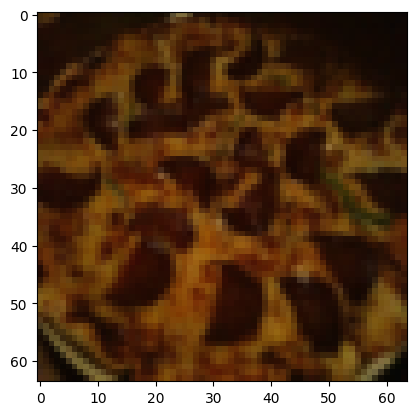

In [16]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset.__getitem__(0)[0].permute(1,2,0))

In [17]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset,batch_size=32,shuffle=True)

In [18]:
train_dataloader